# %%
#  Plots on selected model 

* model: (50t,600,10)
* scale: 125

In [28]:
import pandas as pd 
import numpy as np
from helpers import potus
import glob
import re
import os

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import imp
imp.reload(potus)

<module 'helpers.potus' from '/mnt/batch/tasks/shared/LS_root/mounts/clusters/ilab2-vm2/code/Users/mutazag/ilab2/helpers/potus.py'>

## (50t,600,10)

Load results for scales 125 and 25.

In [58]:
exp = 'potus_50t_600_10'
scales = [25]
result = potus.gridExpResult(exp, scales)

print(len(result.df))
print(len(result.settings))
display(result.settings)
display(result.df.groupby('Nw').speech.count())

load lda model from /home/azureuser/cloudfiles/code/data/processing/potus/experiment/potus_50t_600_10/lda.model
load bow from  /home/azureuser/cloudfiles/code/data/processing/potus/experiment/potus_50t_600_10/bow.pkl
File exists and is readable
/home/azureuser/cloudfiles/code/data/processing/potus/experiment/potus_50t_600_10/speeches_dfr_potus_50t_600_10_klds_100_100.pkl
/home/azureuser/cloudfiles/code/data/processing/potus/experiment/potus_50t_600_10/speeches_dfr_potus_50t_600_10_klds_125_125.pkl
/home/azureuser/cloudfiles/code/data/processing/potus/experiment/potus_50t_600_10/speeches_dfr_potus_50t_600_10_klds_25_25.pkl
t: 50, Nw: 25, Tw:25
962  before trim
/home/azureuser/cloudfiles/code/data/processing/potus/experiment/potus_50t_600_10/speeches_dfr_potus_50t_600_10_klds_50_50.pkl
/home/azureuser/cloudfiles/code/data/processing/potus/experiment/potus_50t_600_10/speeches_dfr_potus_50t_600_10_klds_75_75.pkl
962
1


,kld_filename,topics,Nw,Tw,path
0,speeches_dfr_potus_50t_600_10_klds_25_25.pkl,50,25,25,/home/azureuser/cloudfiles/code/data/processin...


Nw
25    962
Name: speech, dtype: int64

# Prepare ts object


a pandas data frame with a date column set as index. date is converted using `pd.to_datetime`

In [59]:
result.df.date = pd.to_datetime(result.df.date)

In [60]:
ts = result.df[['date', 'speaker', 'title', 'speech', 'novelty', 'transience', 'resonance']].set_index('date')
ts.head()

,speaker,title,speech,novelty,transience,resonance
date,,,,,,
1789-04-30,washington,First Inaugural Address,Fellow Citizens of the Senate and the House of...,0.000000,1.331562,-1.331562
1789-10-03,washington,Thanksgiving Proclamation,Whereas it is the duty of all Nations to ackno...,0.347742,1.387929,-1.040186
1790-01-08,washington,First Annual Message to Congress,Fellow Citizens of the Senate and House of Rep...,0.789467,1.202466,-0.412999
1790-12-08,washington,Second Annual Message to Congress,Fellow citizens of the Senate and House of Rep...,1.163939,1.712157,-0.548218
1790-12-29,washington,Talk to the Chiefs and Counselors of the Senec...,"I the President of the United States, by my ow...",1.920160,2.423603,-0.503444


In [61]:
ts.loc['2008-01-01':'2018-12-31']

,speaker,title,speech,novelty,transience,resonance
date,,,,,,
2008-01-28,gwbush,State of the Union Address,"Madam Speaker, Vice President Cheney, members ...",1.748165,2.051343,-0.303178
2008-03-19,gwbush,Remarks on the War on Terror,"Thank you all. Deputy Secretary England, thank...",1.433824,2.953103,-1.519279
2008-08-28,obama,Acceptance Speech at the Democratic National C...,To Chairman Dean and my great friend Dick Durb...,2.642174,1.928734,0.713440
2008-10-03,gwbush,Remarks on Emergency Economic Stabilization Ac...,"A short time ago, the House of Representatives...",3.339841,2.308997,1.030843
2008-11-04,obama,Remarks on Election Night,If there is anyone out there who still doubts ...,2.445935,2.056777,0.389158
2008-11-13,gwbush,Speech on Financial Markets and the World Economy,Thank you very much. Please be seated. Thank y...,2.464317,1.763558,0.700760
2008-12-19,gwbush,Remarks on Plan to Assist Automakers,"Good morning. For years, America's automakers ...",3.146432,2.309540,0.836892
2009-01-12,gwbush,Final Press Conference,\n<THE PRESIDENT:> Thank you. Tapper. We have ...,3.645072,3.182389,0.462683
2009-01-15,gwbush,Farewell Address to the Nation,"Fellow citizens:\nFor eight years, it has been...",1.613090,1.937509,-0.324420


# plots

In [62]:
sns.set(rc={'figure.figsize':(11, 4)})

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f7bde2a5710>,
      dtype=object)

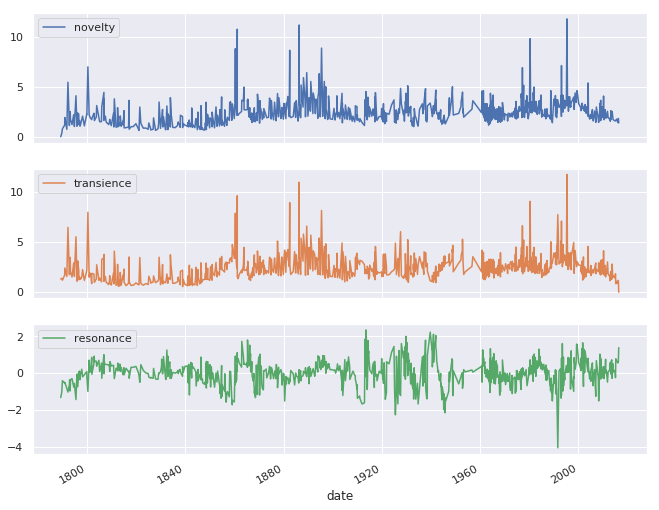

In [63]:
plot_cols = ['novelty', 'transience', 'resonance']
ts[plot_cols].plot(
     figsize=(11, 9),
    subplots=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f7be9868c50>,
      dtype=object)

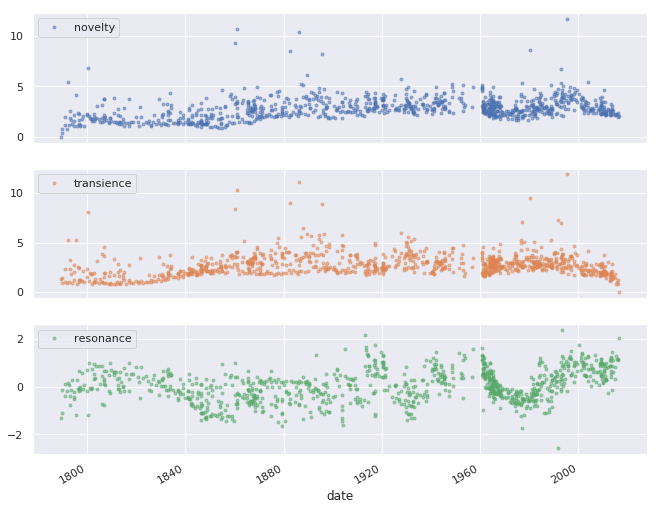

In [40]:
ts[plot_cols].plot(
    marker='.', 
    alpha=.5,
    linestyle='None',
    figsize=(11, 9),
    subplots=True)

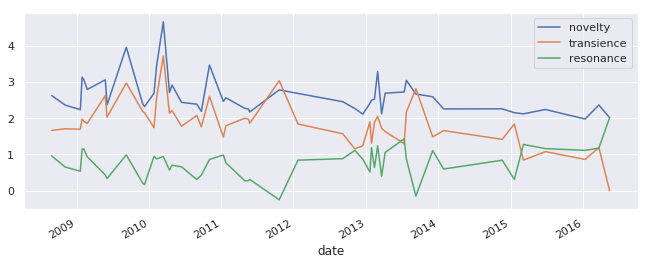

In [47]:
ts.query('speaker == "obama"').plot()

In [56]:
# monthly resampling, 

ts_monthly = ts.resample('M').max() #mean or other aggregate

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f7bde26ef28>,
      dtype=object)

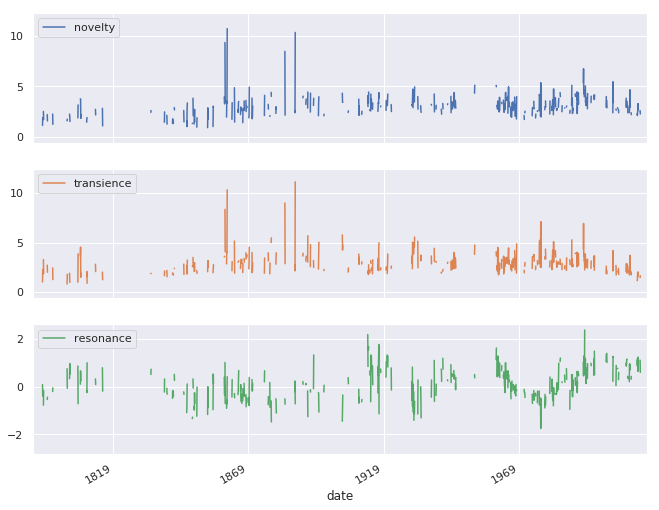

In [57]:
ts_monthly.plot(
    #marker='.',
    #linestyle='None',
    figsize=(11, 9),
    subplots=True)